In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Happiness_score.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df.drop('Happiness Rank',axis=1,inplace=True)

In [5]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
df.drop('Country',axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
enc = OneHotEncoder()

In [9]:
enc_df = pd.DataFrame(enc.fit_transform(df[['Region']]).toarray(),dtype=int,columns=['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'])

In [10]:
enc_df

,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,1,0
154,0,0,0,0,0,0,0,0,1,0
155,0,0,0,0,1,0,0,0,0,0
156,0,0,0,0,0,0,0,0,1,0


In [11]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [12]:
df=pd.concat([df,enc_df],axis=1)

In [13]:
df.drop('Region',axis=1,inplace=True)

In [14]:
df.isnull().sum()

Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Western Europe                     0
North America                      0
Australia and New Zealand          0
Middle East and Northern Africa    0
Latin America and Caribbean        0
Southeastern Asia                  0
Central and Eastern Europe         0
Eastern Asia                       0
Sub-Saharan Africa                 0
Southern Asia                      0
dtype: int64

In [15]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,0.012658,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165,0.132911
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.112150,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207,0.340558
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Happiness Score                  158 non-null    float64
 1   Standard Error                   158 non-null    float64
 2   Economy (GDP per Capita)         158 non-null    float64
 3   Family                           158 non-null    float64
 4   Health (Life Expectancy)         158 non-null    float64
 5   Freedom                          158 non-null    float64
 6   Trust (Government Corruption)    158 non-null    float64
 7   Generosity                       158 non-null    float64
 8   Dystopia Residual                158 non-null    float64
 9   Western Europe                   158 non-null    int32  
 10  North America                    158 non-null    int32  
 11  Australia and New Zealand        158 non-null    int32  
 12  Middle East and Northe

In [17]:
dfcor=df.corr()
dfcor

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,0.189404,-0.017781,0.043593,0.270962,0.010395,0.188213,-0.012551,-0.149944,-0.598318,0.450688
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.070319,-0.074266,-0.123912,0.311608,-0.034474,-0.072373,-0.074681,-0.198069,0.252553,-0.235011
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.125597,0.113626,0.151116,0.030705,0.209213,0.144904,-0.034912,-0.153053,-0.674692,0.440831
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.134871,0.108266,0.079310,0.168394,-0.098930,0.122531,-0.045784,-0.274165,-0.390201,0.369525
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.133185,0.170398,0.199353,0.120207,0.116477,0.116517,0.046997,-0.078178,-0.822475,0.443328
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.163338,-0.222040,0.044804,0.195791,-0.169455,0.121274,0.210224,-0.079231,-0.242908,0.316182
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.235981,-0.224869,-0.026114,-0.088236,0.121793,0.095399,0.016132,-0.073572,-0.095100,0.288077
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.195480,-0.319256,-0.017952,-0.062130,-0.141445,0.172405,0.354137,0.177543,-0.074499,0.200940
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.034141,-0.066659,-0.150279,0.381649,-0.082078,0.078377,-0.140727,-0.032077,-0.083353,0.037044
Western Europe,0.189404,-0.070319,0.125597,0.134871,0.133185,0.163338,0.235981,0.195480,0.034141,1.000000,-0.053685,-0.022496,-0.045540,-0.043105,-0.012821,-0.027828,-0.024379,-0.065924,-0.044330


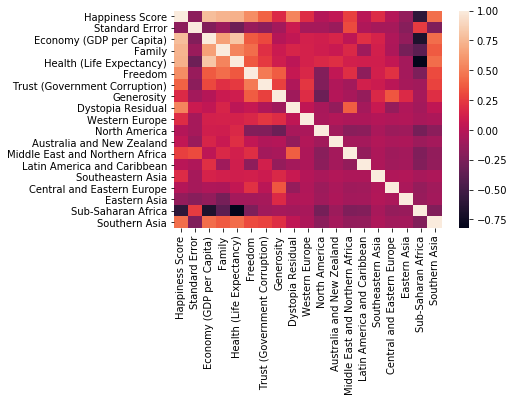

In [18]:
sns.heatmap(dfcor)

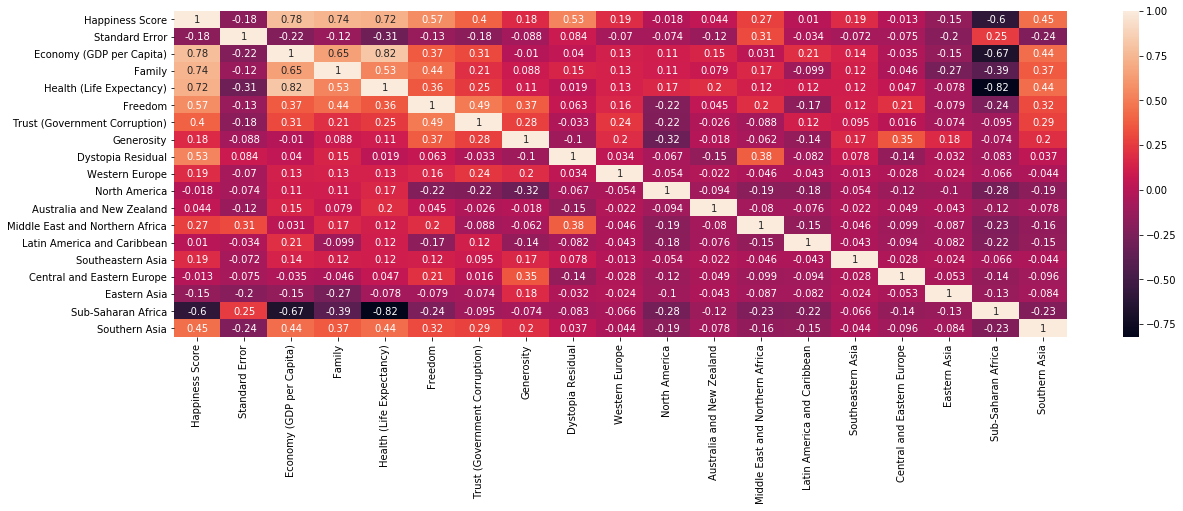

In [19]:
plt.figure(figsize=(20,6))
sns.heatmap(dfcor,annot=True)

In [20]:
df.skew()

Happiness Score                    0.097769
Standard Error                     1.983439
Economy (GDP per Capita)          -0.317575
Family                            -1.006893
Health (Life Expectancy)          -0.705328
Freedom                           -0.413462
Trust (Government Corruption)      1.385463
Generosity                         1.001961
Dystopia Residual                 -0.238911
Western Europe                     8.802321
North America                      1.650669
Australia and New Zealand          4.881004
Middle East and Northern Africa    2.104155
Latin America and Caribbean        2.267677
Southeastern Asia                  8.802321
Central and Eastern Europe         3.859823
Eastern Asia                       4.471763
Sub-Saharan Africa                 1.146245
Southern Asia                      2.183443
dtype: float64

Happiness Score                       AxesSubplot(0.125,0.536818;0.065678x0.343182)
Standard Error                     AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Economy (GDP per Capita)           AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Family                             AxesSubplot(0.361441,0.536818;0.065678x0.343182)
Health (Life Expectancy)           AxesSubplot(0.440254,0.536818;0.065678x0.343182)
Freedom                            AxesSubplot(0.519068,0.536818;0.065678x0.343182)
Trust (Government Corruption)      AxesSubplot(0.597881,0.536818;0.065678x0.343182)
Generosity                         AxesSubplot(0.676695,0.536818;0.065678x0.343182)
Dystopia Residual                  AxesSubplot(0.755508,0.536818;0.065678x0.343182)
Western Europe                     AxesSubplot(0.834322,0.536818;0.065678x0.343182)
North America                            AxesSubplot(0.125,0.125;0.065678x0.343182)
Australia and New Zealand             AxesSubplot(0.203814,0.125;0.065678x0.

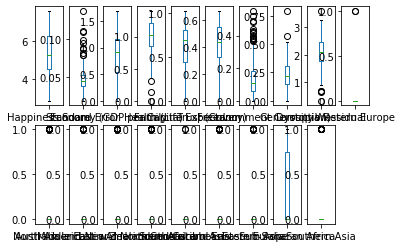

In [25]:
df.plot(kind='box',subplots=True,layout=(2,10))

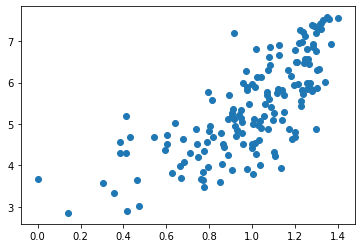

In [26]:
plt.scatter(df['Family'],df['Happiness Score'])

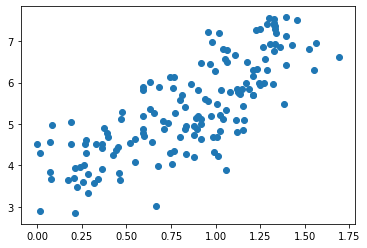

In [27]:
plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Score'])

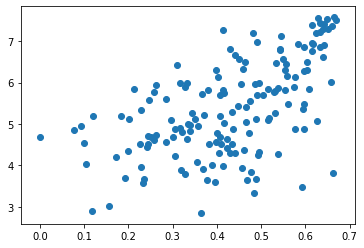

In [28]:
plt.scatter(df['Freedom'],df['Happiness Score'])

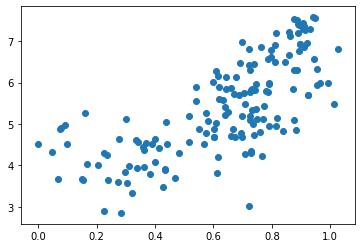

In [29]:
plt.scatter(df['Health (Life Expectancy)'],df['Happiness Score'])

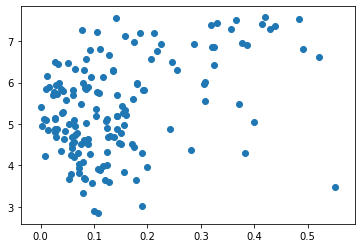

In [30]:
plt.scatter(df['Trust (Government Corruption)'],df['Happiness Score'])

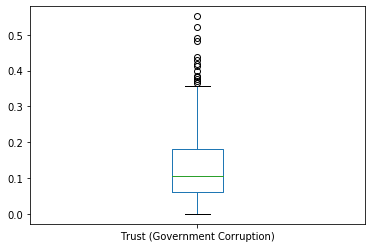

In [31]:
df['Trust (Government Corruption)'].plot.box()

In [32]:
z=np.abs(zscore(df))


In [33]:
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 0.21530819, 0.58222251,
        2.55417492],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.21530819, 0.58222251,
        2.55417492],
       [1.88479215, 0.8544869 , 1.19286069, ..., 0.21530819, 0.58222251,
        2.55417492],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.21530819, 0.58222251,
        0.39151586],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.21530819, 1.7175564 ,
        0.39151586],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.21530819, 1.7175564 ,
        0.39151586]])

In [35]:
print(np.where(z>3))

(array([  4,   8,   9,  14,  23,  27,  33,  37,  40,  45,  46,  60,  64,
        71,  73,  74,  78,  80,  83,  89,  98,  99, 108, 115, 116, 120,
       128, 128, 131, 144, 147, 152, 153, 155, 157], dtype=int64), array([14,  9,  9, 14, 15,  6, 15, 11,  1, 11, 11, 15,  1, 11, 15, 15, 16,
       16, 11, 15, 15, 11, 16,  1, 16, 16,  7, 15, 16, 15,  3, 16,  6,  8,
        3], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(124, 19)

In [37]:
df.shape

(158, 19)

In [40]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [41]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Western Europe,North America,Australia and New Zealand,Middle East and Northern Africa,Latin America and Caribbean,Southeastern Asia,Central and Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0,1
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0,1
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0,1
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0,1
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,0,1,0
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,0,1,0
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,0,1,0,0,0,0,0
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,0,1,0


In [42]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=42)

In [46]:
x_train.shape

(121, 18)

In [47]:
x_test.shape

(37, 18)

In [48]:
LR=LinearRegression()

In [49]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
LR.coef_

array([-1.70135275e-03,  1.00020740e+00,  9.99959304e-01,  9.99786296e-01,
        9.99935954e-01,  1.00006157e+00,  1.00014800e+00,  1.00002068e+00,
       -9.45409081e-05,  1.39732501e-04, -5.35952032e-05,  1.29998560e-04,
        7.23750972e-05, -2.53121063e-04, -5.03628860e-05,  1.97840614e-04,
       -4.01332103e-06, -8.43133913e-05])

In [51]:
LR.intercept_

-4.2172114143035344e-05

In [52]:
LR.score(x_train,y_train)

0.9999999433234533

In [53]:
pred=LR.predict(x_test)
print("Predicted by machine",pred)
print("Actual price",y_test)

Predicted by machine [4.30691835 5.98699392 4.19425795 2.90435061 5.05718847 6.57412085
 4.89739196 4.87593379 4.94868976 3.93073339 6.90149228 5.8283498
 6.98267123 5.54829254 6.78633192 6.50516467 4.50710613 4.68560819
 4.9709693  5.69517647 3.6550392  6.93728897 7.19977684 7.28396962
 6.48524702 5.19230659 5.88903802 3.9555158  4.36906273 3.68074073
 3.7807063  5.33248597 3.99470409 5.83269414 4.34999593 5.12879113
 3.33999318]
Actual price 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.995
55     5.833
126    4.350
84     5.129
154    3.340
Name: Happiness Score, dtype: float64


In [54]:
print("Errors:")
print("Mean Squered",mean_squared_error(y_test,pred))
print("Mean absulate",mean_absolute_error(y_test,pred))
print("RMS",np.sqrt(mean_squared_error(y_test,pred)))

Errors:
Mean Squered 8.443442394606407e-08
Mean absulate 0.00023787310460492787
RMS 0.0002905760209412746


In [56]:
print(r2_score(y_test,pred))

0.9999999397029263


In [58]:
from sklearn.model_selection import cross_val_score
dtscore=cross_val_score(LR,x,y,cv=4)
print('cross validation=',dtscore)
print(dtscore.mean(),dtscore.std())

cross validation= [0.99999959 0.99999852 0.99999702 0.99999938]
0.999998628566748 1.013235590622897e-06


In [61]:
from sklearn.externals import joblib
joblib.dump(LR,'LR_Happiness_Score.pkl')

['LR_Happiness_Score.pkl']